In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the datasets
innocent_data = pd.read_csv('/Users/daniellebalque/Downloads/LIWC-22 Results - Innocent Dataset - LIWC Analysis.csv')
culprit_data = pd.read_csv('/Users/daniellebalque/Downloads/LIWC-22 Results - Culprit Dataset - LIWC Analysis.csv')

# Label the data
culprit_data['Offender'] = 1  # Culprit
innocent_data['Offender'] = 0  # Innocent

# Combine datasets
combined_data = pd.concat([culprit_data, innocent_data], ignore_index=True)

# Select features and target
features = ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone',
            'pronoun', 'ppron', 'i', 'we', 'you', 'they',
            'verb', 'adj', 'adverb', 'conj', 'negate',
            'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad']
X = combined_data[features]
y = combined_data['Offender']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy and classification report
print('Output:')
print("     Accuracy:", accuracy)
print("     Classification Report:\n", classification_rep)

Output:
     Accuracy: 0.545
     Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11       193
           1       0.53      1.00      0.69       207

    accuracy                           0.55       400
   macro avg       0.77      0.53      0.40       400
weighted avg       0.76      0.55      0.41       400



Output:


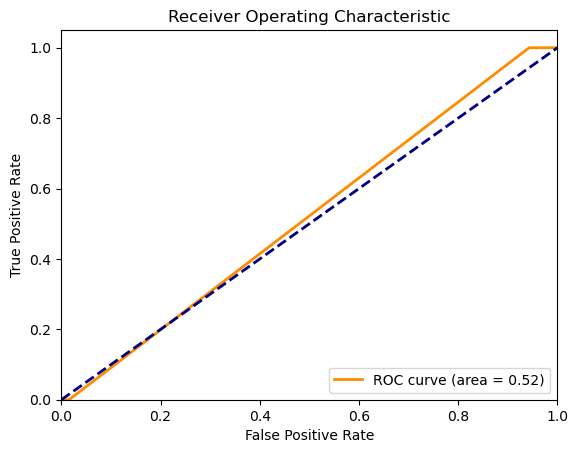

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'model' is your trained logistic regression model and 'X_test' is your test data
# Calculate the probabilities of positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

print('Output:')

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:
# Add a label to each dataset to distinguish culprits from innocents
culprit_data['Culprit'] = 1  # Culprits are labeled as 1
innocent_data['Culprit'] = 0  # Innocents are labeled as 0

# Combine the datasets
combined_data = pd.concat([culprit_data, innocent_data], ignore_index=True)

# Selecting relevant LIWC features for analysis
features = ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad']

# Compute correlation matrix
correlation_matrix = combined_data[features + ['Culprit']].corr()

# Extracting correlations with 'Culprit'
culprit_correlations = correlation_matrix['Culprit'].drop('Culprit')  # exclude self-correlation
print('Output:')
print('     Below is the likelihood of a culprit obtaining one of these features:')
print()
print(culprit_correlations)

Output:
     Below is the likelihood of a culprit obtaining one of these features:

WC          -0.059706
Analytic    -0.112509
Clout       -0.084296
Authentic    0.069154
Tone        -0.067734
Affect       0.054481
tone_pos     0.038414
tone_neg     0.026324
emotion      0.058237
emo_pos      0.018134
emo_neg      0.033041
emo_anx     -0.034267
emo_anger    0.120935
emo_sad      0.236327
Name: Culprit, dtype: float64


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



cleaned_data = combined_data.dropna()

# Select features and target from the cleaned dataset
features_cleaned = cleaned_data.drop(['Show', 'Character', 'Dialogue', 'Segment', 'Offender'], axis=1)
target_cleaned = cleaned_data['Offender']

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    features_cleaned, target_cleaned, test_size=0.2, random_state=42)

# Initialize and train the linear regression model on the cleaned data
lin_reg_cleaned = LinearRegression()
lin_reg_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predict on the cleaned test set
y_pred_cleaned = lin_reg_cleaned.predict(X_test_cleaned)

# Calculate metrics for the cleaned data model
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)


In [12]:
features = cleaned_data.drop(['Show', 'Character', 'Dialogue', 'Segment', 'Offender'], axis=1)
target = cleaned_data['Offender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions using the model on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Output:')
print("     Mean Squared Error:", mse)
print("     R-squared:", r2)

Output:
     Mean Squared Error: 1.313528283185695e-29
     R-squared: 1.0
